In [15]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

not cat


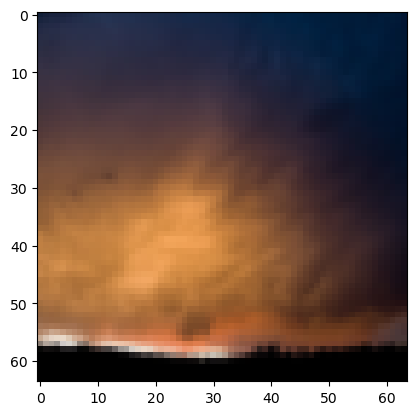

not cat


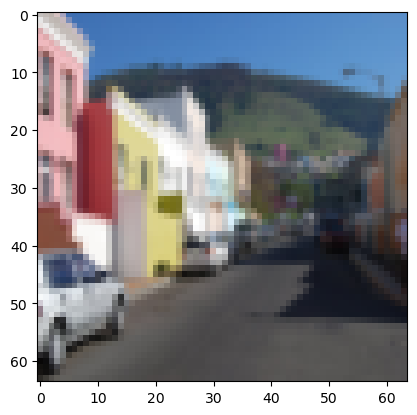

cat


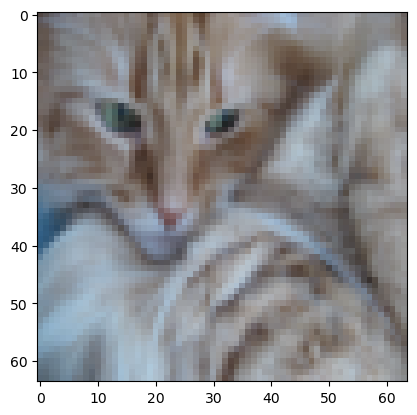

not cat


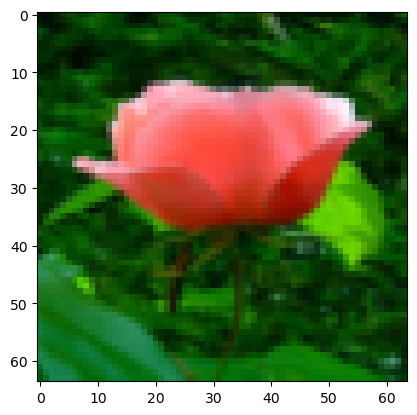

not cat


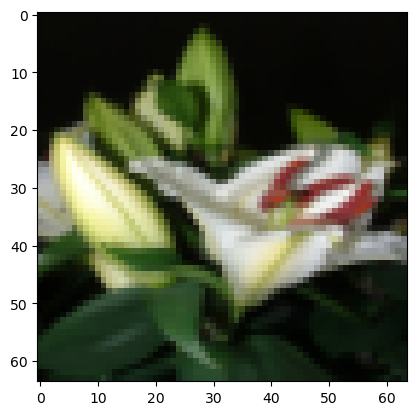

In [28]:
f = h5py.File("data/train_catvnoncat.h5", "r")


for i, (image, is_cat) in enumerate(zip(f["train_set_x"], f["train_set_y"])):
    if i >= 10:
        break

    print("cat" if is_cat else "not cat")

    plt.imshow(image)
    plt.show()